In [1]:
import h5py
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
array_qcd_old = np.load('ntuples/dataset_fake_tau.npy')
array_qcd_new = np.load('ntuples/dataset_fake_tau_MC20.npy')
print(array_qcd_old.shape)
print(array_qcd_new.shape)

(1060682, 10, 8)
(1036878, 35, 11)


In [3]:
%matplotlib notebook

<IPython.core.display.Javascript object>


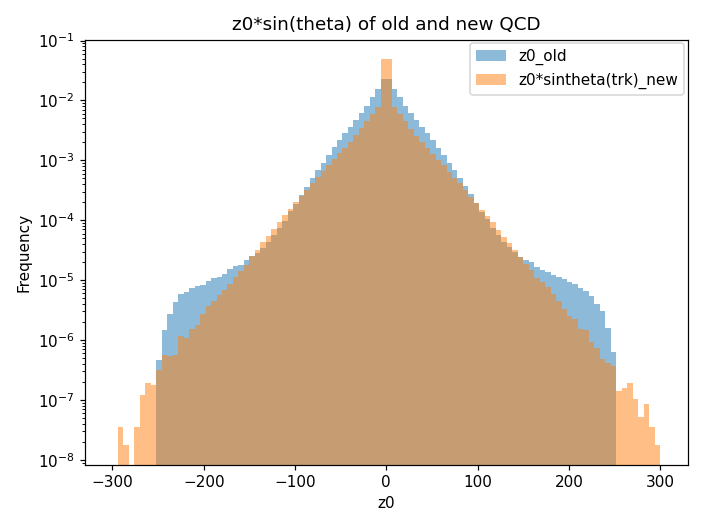

In [18]:
set_variable = ['DeltaEta', 'DeltaPhi', 'Pt', 'E', 'd0', 'z0', 'theta', 'Track-Flag']
set_variable_NEW = ['DEta', 'DPhi', 'Pt(trk)', 'Et(cls)', 'E(cls)', 'd0(trk)', 'z0*sintheta(trk)', 'lambda(cls)', 'lambda2(cls)', 'r2(cls)', 'Flag']   
mask_old = [-9, -9, -999, -999, -999, -999, -999, -9]
xlow = [-0.8, -0.8, 0, 0, -200, -300, 0, 0]
xup = [0.8, 0.8, 10**9, 10**9, 200, 300, 3.25, 4]

mask_new = [-9, -9, -999, 0., 0., -999, -999,  0., 0., 0., -9]
mask_cluster = [-9, -9, 0., -999, -999, 0., 0., -999, -999, -999, -10]
setted_old_var = 5 #btw 0 and 3
setted_new_var = 6 #btw 0 and 3
#cleaning of variable from mask and values bigger than 10**9
#a = array_qcd_old[:,:,setted_old_var]
a = array_qcd_old[:,:,5] * np.sin(array_qcd_old[:,:,6])
c =  array_qcd_old[:,:,5] != mask_old[setted_old_var]
b = array_qcd_new[:,:,setted_new_var]
d =  (b != mask_new[setted_new_var] ) * (b!= mask_cluster[setted_new_var] )
a = a[c]
b = b[d]

n_bins=100
fig=plt.figure(tight_layout=True)
ax = plt.subplot(1,1,1)
ax1 = plt.subplot(1,1,1) # <- with 2 we tell mpl to make room for an extra subplot
#To normalize histograms we set density=True, to get area = 1
ax.hist(a, bins=n_bins , label=set_variable[setted_old_var]+'_old', lw=0.5, alpha=0.5, density=True, range=[xlow[setted_old_var], xup[setted_old_var]] )
ax1.hist(b, bins=n_bins , label=set_variable_NEW[setted_new_var]+'_new', lw=0.5, alpha=0.5, density=True, range=[xlow[setted_old_var], xup[setted_old_var]] )
plt.title("z0*sin(theta) of old and new QCD")
plt.xlabel(set_variable[setted_old_var])
plt.ylabel('Frequency')
ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0.2)
ax.set_yscale('log')
ax1.set_yscale('log')

### Comparing the DeltaR

In [3]:
selected_class = 3
classes = [-10.00000000e+00,-9.00000000e+00,1.00000000e+00, 2.00000000e+00, 3.00000000e+00, 5.00000000e+00]
#cleaning of variable from mask
tau_dEta = array_tau_old[:,:,0]
tau_dPhi = array_tau_old[:,:,1]
c =  (tau_dEta != -9)
dR_old = np.ones(c.shape) - 3

for i in range(c.shape[0]):
    for j in range(c.shape[1]):
        if c[i,j] and array_tau_old[i,j,7] == classes[selected_class] :
            dR_old[i,j] = np.sqrt( tau_dEta[i,j]**2 + tau_dPhi[i,j]**2 )
dR_old = np.reshape(dR_old, c.shape[0]*c.shape[1])

In [4]:
selected_class = 3
classes = [-10.00000000e+00,-9.00000000e+00,1.00000000e+00, 2.00000000e+00, 3.00000000e+00, 5.00000000e+00]
#cleaning of variable from mask
tau_dEta = array_tau_new[:,:,0]
tau_dPhi = array_tau_new[:,:,1]
c =  (tau_dEta != -9)
dR_new = np.ones(c.shape) - 3

for i in range(c.shape[0]):
    for j in range(c.shape[1]):
        if c[i,j] and array_tau_new[i,j,10] == classes[selected_class] :
            dR_new[i,j] = np.sqrt( tau_dEta[i,j]**2 + tau_dPhi[i,j]**2 )
dR_new = np.reshape(dR_new, c.shape[0]*c.shape[1])

<IPython.core.display.Javascript object>


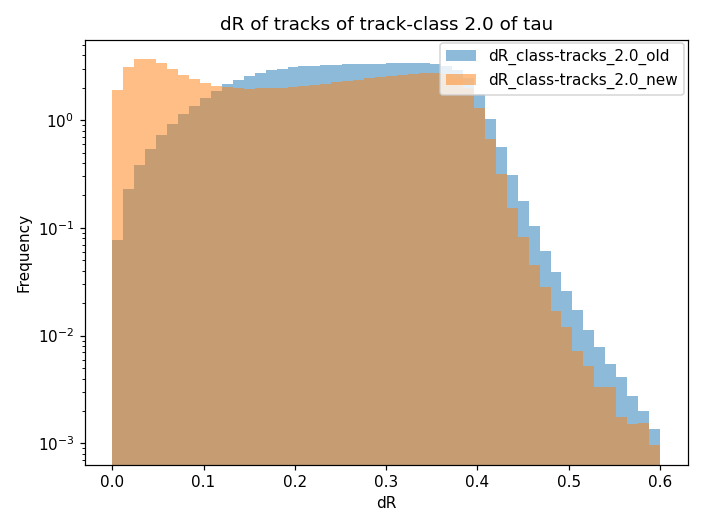

In [8]:
xlow = [0, 0, 0, 0, 0]
xup = [0, 0, 0.6, 0.6, 0.6] #class 1 arrives until 0.55
n_bins=50

c = dR_old != -2
dR_old = dR_old[c]
c = dR_new != -2
dR_new = dR_new[c]

fig=plt.figure(tight_layout=True)
ax = plt.subplot(1,1,1)
ax1 = plt.subplot(1,1,1)
#To normalize histograms we set density=True, to get area = 1
ax.hist(dR_old, bins=n_bins , lw=0.5, alpha=0.5, label="dR_class-tracks_"+str(classes[selected_class])+"_old", density=True, range=[xlow[selected_class], xup[selected_class]] )
ax1.hist(dR_new, bins=n_bins , lw=0.5, alpha=0.5, label="dR_class-tracks_"+str(classes[selected_class])+"_new", density=True, range=[xlow[selected_class], xup[selected_class]] )
plt.title("dR of tracks of track-class "+str(classes[selected_class])+" of tau")
plt.xlabel("dR")
plt.ylabel("Frequency")
ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0.2)
ax.set_yscale('log')
ax1.set_yscale('log')

## HERE we compare new Tau with new QCD

In [19]:
array_tau = np.load('ntuples/dataset_tau_MC20.npy')
array_qcd = np.load('ntuples/dataset_fake_tau_MC20.npy')
print(array_tau.shape)
print(array_qcd.shape)

(4907514, 35, 11)
(1036878, 35, 11)


In [32]:
a = array_tau[:,:,0]
c = (array_tau[:,:,10] != 5.)
a = a[c]

print(array_tau[0,:,0])
print(a[:12])

[ 0.15371738 -0.02502819  0.07950596  0.11771823  0.08749959  0.06579842
 -0.2176937   0.26995143  0.11999152 -0.17972732 -0.01712769  0.04587913
 -0.03008394 -0.31665525  0.3510032   0.25660127 -9.         -9.
 -9.         -9.         -9.         -9.         -9.         -9.
 -9.         -9.         -9.         -9.         -9.         -9.
 -9.         -9.         -9.         -9.         -9.        ]
[ 0.15371738 -0.02502819  0.07950596  0.11771823  0.08749959  0.06579842
 -0.2176937   0.26995143  0.11999152 -0.17972732 -9.         -9.        ]


<IPython.core.display.Javascript object>


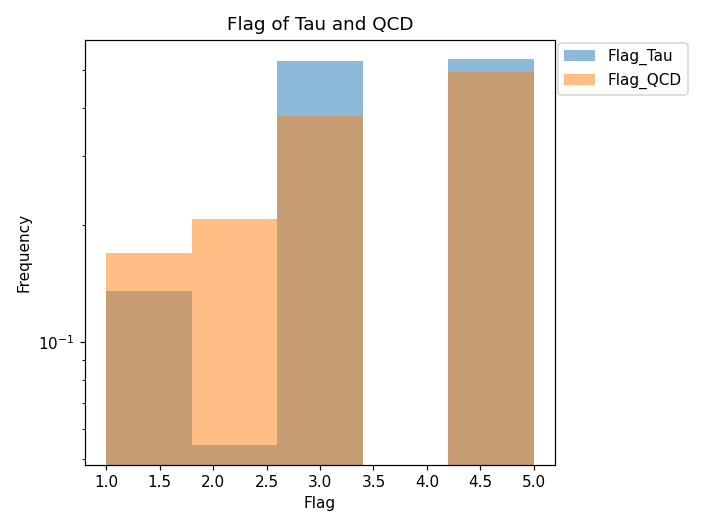

In [58]:
set_variable_NEW = ['DEta', 'DPhi', 'Pt(trk)', 'Et(cls)', 'E(cls)', 'd0(trk)', 'z0*sintheta(trk)', 'lambda(cls)', 'lambda2(cls)', 'r2(cls)', 'Flag']   
mask_track = [-9, -9, -999, 0., 0., -999, -999,  0., 0., 0., -9]
mask_cluster = [-9, -9, 0., -999, -999, 0., 0., -999, -999, -999, -10]

xlow = [-0.8, -0.8,   0,     0,          0,     -170, -400,   0,     0,         0]
xup = [0.8,   0.8, 10**9,  6 * 10**6, 6 * 10**6, 170, 400, 12000, 3 * 10**6, 1.2 * 10**6]

setted_var = 10 #btw 0 and 10
#cleaning of variable from mask and values bigger than 10**9
#a = array_qcd_old[:,:,setted_old_var]
a = array_tau[:,:,setted_var]
c =  (a != mask_track[setted_var] ) * (a!= mask_cluster[setted_var] )# (array_tau[:,:,10] != 5.)
b = array_qcd[:,:,setted_var]
d =  (b != mask_track[setted_var] ) * (b!= mask_cluster[setted_var] )#  (array_qcd[:,:,10] != 5.)
a = a[c]
b = b[d]

n_bins=5
fig=plt.figure(tight_layout=True)
ax = plt.subplot(1,1,1)
ax1 = plt.subplot(1,1,1) # <- with 2 we tell mpl to make room for an extra subplot
#To normalize histograms we set density=True, to get area = 1
ax.hist(a, bins=n_bins , label=set_variable_NEW[setted_var]+'_Tau', lw=0.5, alpha=0.5, density=True,)# range=[xlow[setted_var], xup[setted_var]] )
ax1.hist(b, bins=n_bins , label=set_variable_NEW[setted_var]+'_QCD', lw=0.5, alpha=0.5, density=True,)# range=[xlow[setted_var], xup[setted_var]] )
plt.title(set_variable_NEW[setted_var] + " of Tau and QCD")
plt.xlabel(set_variable_NEW[setted_var])
plt.ylabel('Frequency')
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.2)
ax.set_yscale('log')
ax1.set_yscale('log')

## Here starts Test_on_Jet_and_Tau

In [45]:
#for each tau e have = ['etOverPtLeadTrk', 'ipSigLeadTrk', 'massTrkSys', 'trFlightPathSig',
#                        'isolFrac', 'centFrac', 'dRmax', 'ClustersMeanCenterLambda', 'ClustersMeanSecondLambda']
array = np.load('ntuples/dataset_JT.npy')
print(array.shape)

(14829415, 5)


In [46]:
test = {}
train = {}
g = [True, True, True, True, False]
test_len = 30000
test['features'] = array[:test_len,g]
test['label'] = array[:test_len,4]

train_len = 100000
train['features'] = array[test_len:test_len+train_len,g]
train['label'] = array[test_len:test_len+train_len,4]

In [47]:
print(train['features'].shape)
print(test['features'].shape)
print(train['label'].shape)
print(test['label'].shape)
print(type(train['features']))
print(type(test['features']))
print(type(train['label']))
print(type(test['label']))

(100000, 4)
(30000, 4)
(100000,)
(30000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [48]:
train['label'][:100]

array([0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.])

In [49]:
%matplotlib notebook

In [50]:
a = array[:,4] == 1
b = array[:,4] == 0
print(a.shape)
print(b.shape)
array_tau = array[a,:]
array_qcd = array[b,:]

(14829415,)
(14829415,)


In [51]:
print(test['features'][7])
print(array_tau[3])

[-1.56399441e+00  2.86945963e+00  9.20305625e+04  3.69069570e+04]
[-1.56399441e+00  2.86945963e+00  9.20305625e+04  3.69069570e+04
  1.00000000e+00]


<IPython.core.display.Javascript object>


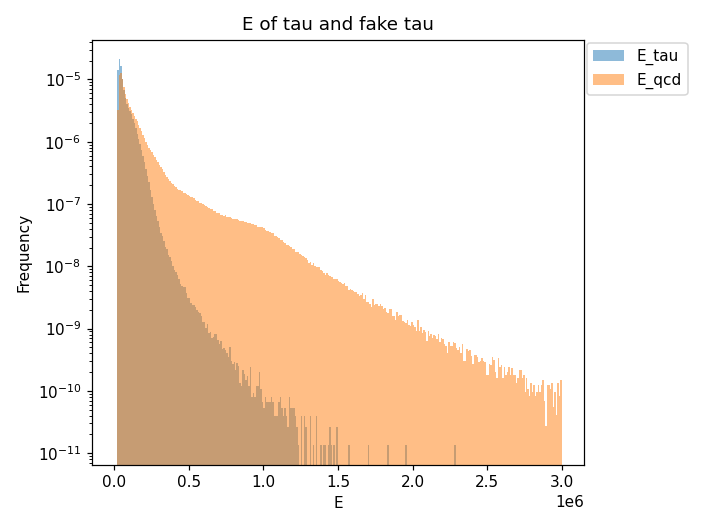

In [52]:
set_variable = ['Eta', 'Phi', 'E', 'Pt']
xlow = [-4.5, -3.5, 0, 0]
xup = [4.5, 3.5, 3*10**6, 10**6]
setted_var = 2 #btw 0 and 3
n_bins=300
fig=plt.figure(tight_layout=True)
ax = plt.subplot(1,1,1)
ax1 = plt.subplot(1,1,1) # <- with 2 we tell mpl to make room for an extra subplot
#To normalize histograms we set density=True, to get area = 1
ax.hist(array_tau[:,setted_var], bins=n_bins , label=set_variable[setted_var]+'_tau', lw=0.5, alpha=0.5, density=True, range=[xlow[setted_var], xup[setted_var]] )
ax1.hist(array_qcd[:,setted_var], bins=n_bins , label=set_variable[setted_var]+'_jet', lw=0.5, alpha=0.5, density=True, range=[xlow[setted_var], xup[setted_var]])
plt.title(set_variable[setted_var]+" of tau and fake tau")
plt.xlabel(set_variable[setted_var])
plt.ylabel('Frequency')
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.2)
ax.set_yscale('log')
ax1.set_yscale('log')

### Start testing DL models

In [53]:
model_1 = tf.keras.models.Sequential(name="model_MLP", layers=[
    tf.keras.Input(shape=(4)),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_1.summary()

Model: "model_MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


In [54]:
import logging
logging.basicConfig(level=logging.INFO, format='[%(asctime)s] %(levelname)s: %(message)s')

def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 10:
        lr *= 0.1
    logging.info('Learning rate: %f'%lr)
    return lr
opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule(0))

model_1.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

[2022-02-02 15:47:20,911] INFO: Learning rate: 0.001000


In [55]:
# Prepare model model saving directory.
import os
save_dir = 'model_checkpoints'
model_name = 'MLP_on_Jet_and_Tau.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

lr_scheduler = keras.callbacks.LearningRateScheduler(lr_schedule)
progress_bar = keras.callbacks.ProgbarLogger()
callbacks = [checkpoint, lr_scheduler, progress_bar]

In [56]:
def shuffle(dict_data, seed=None):
    if seed is not None:
        np.random.seed(seed)
    shuffle_indices = np.arange( len(dict_data['label']))#Len data.points has to be the same for data.features and data.label
    np.random.shuffle(shuffle_indices)
    for k in dict_data:
        dict_data[k] = dict_data[k][shuffle_indices]
    return shuffle_indices, dict_data

#Pre-processing
shuffled_ind, train = shuffle(train)
scaler = MinMaxScaler()
scaler.fit(train['features'])
train_scaled = scaler.transform(train['features'])

scaler = MinMaxScaler()
scaler.fit(test['features'])
test_scaled = scaler.transform(test['features'])

print(np.max(train['features'], axis=0))
print(np.min(train['features'], axis = 0))
print(np.max(train_scaled, axis=0))

[4.41503906e+00 3.14146304e+00 2.44744475e+06 6.84289438e+05]
[-4.40964937e+00 -3.14155722e+00  2.00366445e+04  2.00014258e+04]
[1. 1. 1. 1.]


In [57]:
#g = [True,True,False,True,True,True,True,False,False]
history = model_1.fit(
    train_scaled,
    train['label'],
    batch_size=128,
    epochs=20,
    shuffle=True,
    validation_split = 0.15,
    callbacks=callbacks)

[2022-02-02 15:47:21,046] INFO: Learning rate: 0.001000


Epoch 1/20
      0/Unknown - 3s 0s/sample - loss: 0.6915 - accuracy: 0.5363
Epoch 00001: val_accuracy improved from -inf to 0.53713, saving model to model_checkpoints/MLP_on_Jet_and_Tau.h5
665/665 [==============================] - 3s 4ms/sample - loss: 0.6915 - accuracy: 0.5361 - val_loss: 0.6911 - val_accuracy: 0.5371 - lr: 0.0010


[2022-02-02 15:47:23,989] INFO: Learning rate: 0.001000


Epoch 2/20
  0/665 [..............................] - ETA: 0s - loss: 0.6902 - accuracy: 0.5424
Epoch 00002: val_accuracy did not improve from 0.53713
665/665 [==============================] - 3s 4ms/sample - loss: 0.6902 - accuracy: 0.5424 - val_loss: 0.6907 - val_accuracy: 0.5371 - lr: 0.0010


[2022-02-02 15:47:26,573] INFO: Learning rate: 0.001000


Epoch 3/20
  0/665 [..............................] - ETA: 0s - loss: 0.6899 - accuracy: 0.5425
Epoch 00003: val_accuracy did not improve from 0.53713
665/665 [==============================] - 3s 4ms/sample - loss: 0.6899 - accuracy: 0.5424 - val_loss: 0.6905 - val_accuracy: 0.5371 - lr: 0.0010


[2022-02-02 15:47:29,169] INFO: Learning rate: 0.001000


Epoch 4/20
  0/665 [..............................] - ETA: 0s - loss: 0.6897 - accuracy: 0.5423
Epoch 00004: val_accuracy did not improve from 0.53713
665/665 [==============================] - 3s 4ms/sample - loss: 0.6897 - accuracy: 0.5424 - val_loss: 0.6904 - val_accuracy: 0.5371 - lr: 0.0010


[2022-02-02 15:47:31,788] INFO: Learning rate: 0.001000


Epoch 5/20
  0/665 [..............................] - ETA: 0s - loss: 0.6895 - accuracy: 0.5424
Epoch 00005: val_accuracy did not improve from 0.53713
665/665 [==============================] - 3s 4ms/sample - loss: 0.6895 - accuracy: 0.5424 - val_loss: 0.6902 - val_accuracy: 0.5371 - lr: 0.0010


[2022-02-02 15:47:34,386] INFO: Learning rate: 0.001000


Epoch 6/20
  0/665 [..............................] - ETA: 0s - loss: 0.6894 - accuracy: 0.5423
Epoch 00006: val_accuracy did not improve from 0.53713
665/665 [==============================] - 3s 4ms/sample - loss: 0.6894 - accuracy: 0.5424 - val_loss: 0.6901 - val_accuracy: 0.5371 - lr: 0.0010


[2022-02-02 15:47:36,962] INFO: Learning rate: 0.001000


Epoch 7/20
  0/665 [..............................] - ETA: 0s - loss: 0.6892 - accuracy: 0.5424
Epoch 00007: val_accuracy did not improve from 0.53713
665/665 [==============================] - 3s 4ms/sample - loss: 0.6892 - accuracy: 0.5425 - val_loss: 0.6899 - val_accuracy: 0.5371 - lr: 0.0010


[2022-02-02 15:47:39,564] INFO: Learning rate: 0.001000


Epoch 8/20
  0/665 [..............................] - ETA: 0s - loss: 0.6890 - accuracy: 0.5425
Epoch 00008: val_accuracy improved from 0.53713 to 0.53720, saving model to model_checkpoints/MLP_on_Jet_and_Tau.h5
665/665 [==============================] - 3s 4ms/sample - loss: 0.6890 - accuracy: 0.5425 - val_loss: 0.6898 - val_accuracy: 0.5372 - lr: 0.0010


[2022-02-02 15:47:42,168] INFO: Learning rate: 0.001000


Epoch 9/20
  0/665 [..............................] - ETA: 0s - loss: 0.6889 - accuracy: 0.5424
Epoch 00009: val_accuracy improved from 0.53720 to 0.53733, saving model to model_checkpoints/MLP_on_Jet_and_Tau.h5
665/665 [==============================] - 3s 4ms/sample - loss: 0.6889 - accuracy: 0.5425 - val_loss: 0.6896 - val_accuracy: 0.5373 - lr: 0.0010


[2022-02-02 15:47:44,807] INFO: Learning rate: 0.001000


Epoch 10/20
  0/665 [..............................] - ETA: 0s - loss: 0.6887 - accuracy: 0.5425
Epoch 00010: val_accuracy did not improve from 0.53733
665/665 [==============================] - 3s 4ms/sample - loss: 0.6887 - accuracy: 0.5425 - val_loss: 0.6895 - val_accuracy: 0.5373 - lr: 0.0010


[2022-02-02 15:47:47,394] INFO: Learning rate: 0.001000


Epoch 11/20
  0/665 [..............................] - ETA: 0s - loss: 0.6887 - accuracy: 0.5422
Epoch 00011: val_accuracy did not improve from 0.53733
665/665 [==============================] - 3s 4ms/sample - loss: 0.6886 - accuracy: 0.5426 - val_loss: 0.6893 - val_accuracy: 0.5373 - lr: 0.0010


[2022-02-02 15:47:49,972] INFO: Learning rate: 0.000100


Epoch 12/20
  0/665 [..............................] - ETA: 0s - loss: 0.6885 - accuracy: 0.5424
Epoch 00012: val_accuracy did not improve from 0.53733
665/665 [==============================] - 3s 4ms/sample - loss: 0.6885 - accuracy: 0.5426 - val_loss: 0.6893 - val_accuracy: 0.5373 - lr: 1.0000e-04


[2022-02-02 15:47:52,588] INFO: Learning rate: 0.000100


Epoch 13/20
  0/665 [..............................] - ETA: 0s - loss: 0.6885 - accuracy: 0.5423
Epoch 00013: val_accuracy did not improve from 0.53733
665/665 [==============================] - 3s 4ms/sample - loss: 0.6885 - accuracy: 0.5426 - val_loss: 0.6893 - val_accuracy: 0.5373 - lr: 1.0000e-04


[2022-02-02 15:47:55,237] INFO: Learning rate: 0.000100


Epoch 14/20
  0/665 [..............................] - ETA: 0s - loss: 0.6885 - accuracy: 0.5425
Epoch 00014: val_accuracy did not improve from 0.53733
665/665 [==============================] - 3s 4ms/sample - loss: 0.6885 - accuracy: 0.5426 - val_loss: 0.6893 - val_accuracy: 0.5373 - lr: 1.0000e-04


[2022-02-02 15:47:57,886] INFO: Learning rate: 0.000100


Epoch 15/20
  0/665 [..............................] - ETA: 0s - loss: 0.6885 - accuracy: 0.5426
Epoch 00015: val_accuracy did not improve from 0.53733
665/665 [==============================] - 3s 4ms/sample - loss: 0.6885 - accuracy: 0.5426 - val_loss: 0.6892 - val_accuracy: 0.5373 - lr: 1.0000e-04


[2022-02-02 15:48:00,470] INFO: Learning rate: 0.000100


Epoch 16/20
  0/665 [..............................] - ETA: 0s - loss: 0.6884 - accuracy: 0.5427
Epoch 00016: val_accuracy did not improve from 0.53733
665/665 [==============================] - 3s 4ms/sample - loss: 0.6884 - accuracy: 0.5426 - val_loss: 0.6892 - val_accuracy: 0.5373 - lr: 1.0000e-04


[2022-02-02 15:48:03,082] INFO: Learning rate: 0.000100


Epoch 17/20
  0/665 [..............................] - ETA: 0s - loss: 0.6884 - accuracy: 0.5426
Epoch 00017: val_accuracy did not improve from 0.53733
665/665 [==============================] - 3s 4ms/sample - loss: 0.6884 - accuracy: 0.5426 - val_loss: 0.6892 - val_accuracy: 0.5373 - lr: 1.0000e-04


[2022-02-02 15:48:05,703] INFO: Learning rate: 0.000100


Epoch 18/20
  0/665 [..............................] - ETA: 0s - loss: 0.6884 - accuracy: 0.5426
Epoch 00018: val_accuracy did not improve from 0.53733
665/665 [==============================] - 3s 4ms/sample - loss: 0.6884 - accuracy: 0.5426 - val_loss: 0.6892 - val_accuracy: 0.5373 - lr: 1.0000e-04


[2022-02-02 15:48:08,292] INFO: Learning rate: 0.000100


Epoch 19/20
  0/665 [..............................] - ETA: 0s - loss: 0.6884 - accuracy: 0.5426
Epoch 00019: val_accuracy did not improve from 0.53733
665/665 [==============================] - 3s 4ms/sample - loss: 0.6884 - accuracy: 0.5426 - val_loss: 0.6892 - val_accuracy: 0.5373 - lr: 1.0000e-04


[2022-02-02 15:48:10,853] INFO: Learning rate: 0.000100


Epoch 20/20
  0/665 [..............................] - ETA: 0s - loss: 0.6884 - accuracy: 0.5427
Epoch 00020: val_accuracy did not improve from 0.53733
665/665 [==============================] - 3s 4ms/sample - loss: 0.6884 - accuracy: 0.5426 - val_loss: 0.6892 - val_accuracy: 0.5373 - lr: 1.0000e-04


<IPython.core.display.Javascript object>


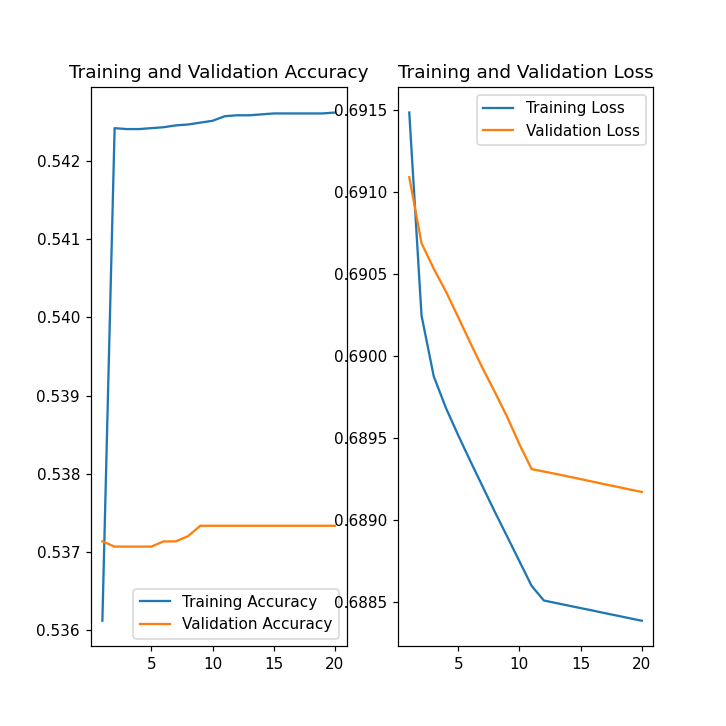

In [58]:
loss=history.history['loss']
val_loss=history.history['val_loss']

mae = history.history['accuracy']
val_mae = history.history['val_accuracy']

epochs_range = range(1, len(loss) + 1)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, mae, label='Training Accuracy')
plt.plot(epochs_range, val_mae, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [59]:
model_1.load_weights("model_checkpoints/MLP_on_Jet_and_Tau.h5")

In [60]:
test_loss, test_acc = model_1.evaluate( test_scaled, test['label'], verbose=2)

938/938 - 2s - loss: 0.6894 - accuracy: 0.5399


In [ ]:
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(train['features'][:30000,0], label='variable')
plt.subplot(1,2,2)
plt.plot(train_scaled[:,0], label='min-max variable')